In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating a housing dataset
np.random.seed(42)
data = pd.DataFrame({
    'size': np.random.randint(500, 3500, 100),  # Size in square feet
    'bedrooms': np.random.randint(1, 5, 100),   # Number of bedrooms
    'age': np.random.randint(1, 30, 100),       # Age of the house
    'price': np.random.randint(50000, 500000, 100)  # Price in dollars
})

In [3]:
# Display the first few rows of the dataset
print(data.head())

   size  bedrooms  age   price
0  1360         4   28  349648
1  1794         4   25  182874
2  1630         4    7   58155
3  1595         3    1  351528
4  2138         3    1  424705


In [4]:
# Display the shape and dimensions of the dataset
print(f"Shape of the dataset: {data.shape}")
print(f"Dimensions of the dataset: {data.ndim}")

Shape of the dataset: (100, 4)
Dimensions of the dataset: 2


In [6]:
# Feature selection
X = data[['size', 'bedrooms', 'age']].values
y = data['price'].values

In [7]:
# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [8]:
# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

In [9]:
# Initialize parameters
theta = np.zeros(X.shape[1])

In [10]:
# Set learning rate and number of iterations
alpha = 0.01
iterations = 1000

In [ ]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        gradient = (1/m) * X.T @ (X @ theta - y)
        theta -= alpha * gradient
    return theta

In [12]:
# Train the model
theta = gradient_descent(X, y, theta, alpha, iterations)
print(f"Model parameters: {theta}")

Model parameters: [272474.21644034 -16376.1321944  -20344.6490338  -17390.93792511]


In [13]:
# Prediction function
def predict(X, theta):
    return X @ theta

In [18]:
# Features for the new house: size, bedrooms, age

size = 2500
bedrooms = 3
age = 10

# Normalize the new house features using the same mean and std as the training data
size_normalized = (size - np.mean(data['size'])) / np.std(data['size'])
bedrooms_normalized = (bedrooms - np.mean(data['bedrooms'])) / np.std(data['bedrooms'])
age_normalized = (age - np.mean(data['age'])) / np.std(data['age'])

# New house features including the intercept term
new_house_features = np.array([1, size_normalized, bedrooms_normalized, age_normalized])

# Predict the price
predicted_price = predict(new_house_features, theta)
print(f"Predicted Price: {predicted_price}")


Predicted Price: 264689.55361701705


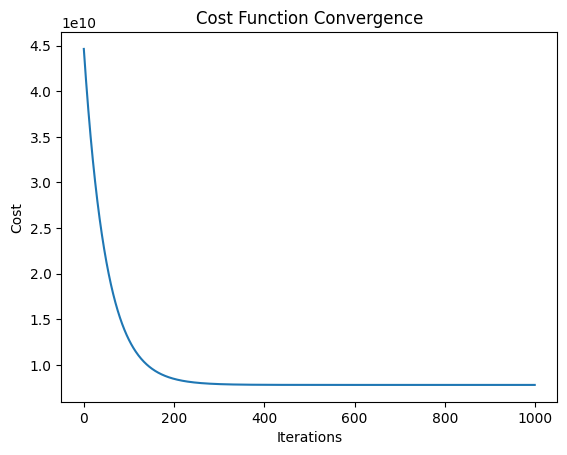

In [16]:
plot_cost_function(X, y, theta, alpha, iterations)